<center><img src="https://matematica.usm.cl/wp-content/themes/dmatUSM/assets/img/logoDMAT2.png" title="Title text" /></center>
<hr style="height:2px;border:none"/>
<h1 align='center'> Modelos GARCH - Simulación estocástica</h1>
<h2 align='center'> Diego Astaburuaga, David Rivas </h2>
<hr style="height:2px;border:none"/>

<p style="text-align: center;">
    <img src="https://github.com/Darkrayyss/Proyecto-Final-MAT281/raw/307f0d0f14aefbff8de7698d0c645d680ced6994/Carpet%20for%20Test%201/images/Capy2.png" alt="Capybara trabajando" width="300" style="border: 7px solid black;">
    <br>
    <small>(Humor) Foto de Diego discutiendo con chatgpt.</small>
</p>

# Definiciones y resultados utilizados

**Definición:** (Proceso GARCH fuerte) Sea $(\eta_t)$ una secuencia de variables independientes e idénticamente distribuidas con distribuci\'on $\eta$. El proceso $(\epsilon_t)$ se le denota como proceso $\operatorname{GARCH}(p,q)$ fuerte (con respecto a la secuencia $(\eta_t)$) si
\begin{equation}
    \left\{
    \begin{aligned}
        \epsilon_t &= \sigma_t \eta_t\\
        \sigma_t^2 &= \omega + \sum_{i=1}^q \alpha_i \epsilon_{t-i}^2+\sum_{j=1}^p\beta_j\sigma_{t-j}^2
    \end{aligned}
    \right.
\end{equation}
donde los $\alpha_i$ y $\beta_j$ son constantes no negativas y $\omega$ es una constante estrictamente positiva.

# Importacion de bibliotecas necesarias

In [30]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Librería arch
# ==============================================================================
from arch import arch_model

# Librería statsmodels
# ==============================================================================
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess

# Otros
# ==============================================================================
from scipy.stats import norm

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Configuración general de gráficos
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

# Histogramas de modelos GARCH

alpha=array([0.25435577]), beta=array([0.64564423])


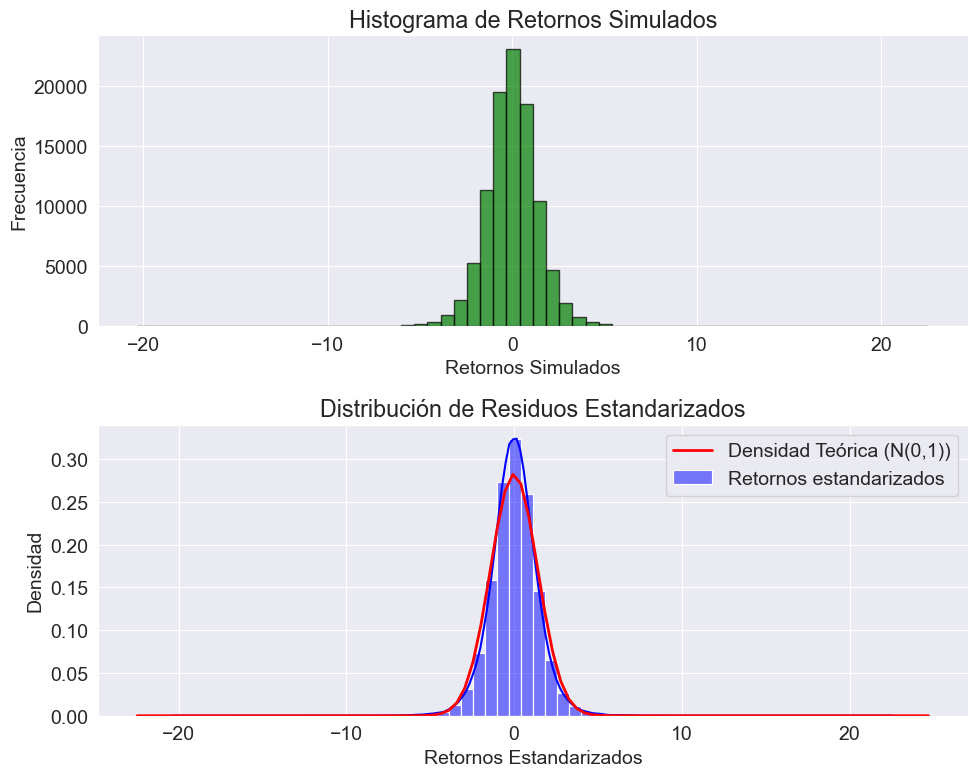

In [40]:
# Establecer la semilla para reproducibilidad
np.random.seed(42)

# Simular una única trayectoria de un modelo GARCH
p = 1
q = 1
mu = 0
omega = 0.2
alpha = np.random.rand(p)
beta = np.random.rand(q)

# Garantizar estacionaridad
if np.sum(alpha) + np.sum(beta) >= 1:
    scale_factor = 0.9 / (np.sum(alpha) + np.sum(beta))
    alpha = alpha * scale_factor
    beta = beta * scale_factor

# Muestra los parámetros
print(f"{alpha=}, {beta=}")

n_datos = 100_000

# Crear y simular el modelo GARCH
sim_mod = arch_model(None, p=p, o=0, q=q, dist="normal")
params = np.concatenate((np.array([mu, omega]), alpha, beta))
sim_data = sim_mod.simulate(params, nobs=n_datos)["data"]

# Crear dos subgráficos, uno encima del otro
plt.figure(figsize=(10, 8))

# Primer gráfico: Histograma de los retornos simulados
plt.subplot(2, 1, 1)
plt.hist(sim_data, bins=60, color='green', alpha=0.7, edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Retornos Simulados')
plt.ylabel('Frecuencia')
plt.title('Histograma de Retornos Simulados')

# Segundo gráfico: Residuos estandarizados y densidad teórica
plt.subplot(2, 1, 2)
sns.histplot(sim_data, color='blue', kde=True, stat='density', bins=60, label='Retornos estandarizados')
plt.title('Distribución de Residuos Estandarizados')
plt.xlabel('Retornos Estandarizados')
plt.ylabel('Densidad')

# Añadir la curva de densidad teórica (normal 0,1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(sim_data), np.std(sim_data))
plt.plot(x, p, 'r', linewidth=2, label='Densidad Teórica (N(0,1))')

# Añadir leyenda
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Se observa que los residuos generados no distribuyen normal.

# Comportamiento cualitativo de trayectorias.

## No estacionaridad

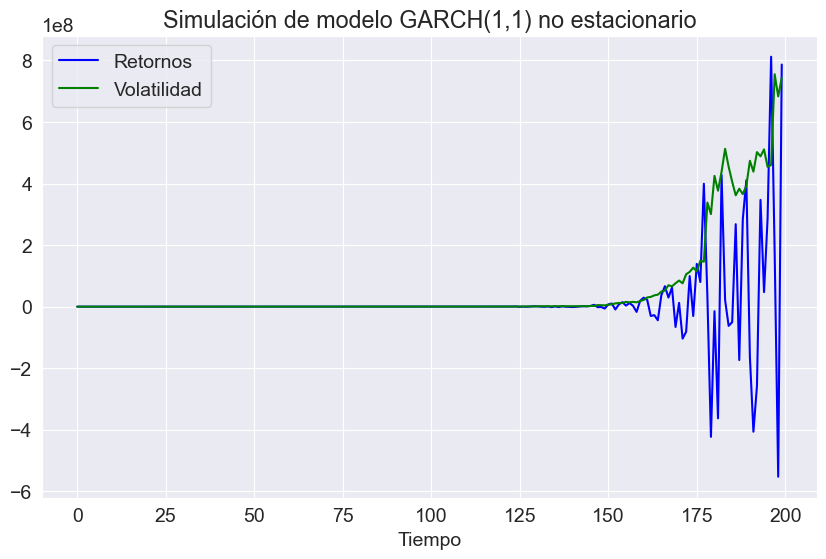

In [41]:
# Function to simulate GARCH(1,1) model without stationarity
def simulate_garch(n_obs):
    # Generate random parameters
    alpha = np.random.uniform(0.5, 0.8)
    beta = np.random.uniform(0.5, 0.8)
    omega = np.random.uniform(0.5, 1.5)

    # Simulate GARCH(1,1) process
    returns = np.zeros(n_obs)
    volatility = np.zeros(n_obs)

    for t in range(1, n_obs):
        epsilon = np.random.normal(size=1)
        volatility[t] = np.sqrt(omega + alpha * returns[t-1]**2 + beta * volatility[t-1]**2)
        returns[t] = volatility[t] * epsilon

    return returns, volatility

# Simulate GARCH(1,1) without stationarity with 500 observations
n_obs = 200
np.random.seed(42)
returns, volatility = simulate_garch(n_obs)

# Plot the simulated GARCH(1,1) process
plt.figure(figsize=(10, 6))
plt.plot(returns, label='Retornos', color='blue')
plt.plot(volatility, label='Volatilidad', color='green')
plt.title('Simulación de modelo GARCH(1,1) no estacionario')
plt.xlabel('Tiempo')
plt.legend()
plt.grid(True)
plt.show()

## Modelo GARCH(1,1)

### Simulación de trayectorias del modelo

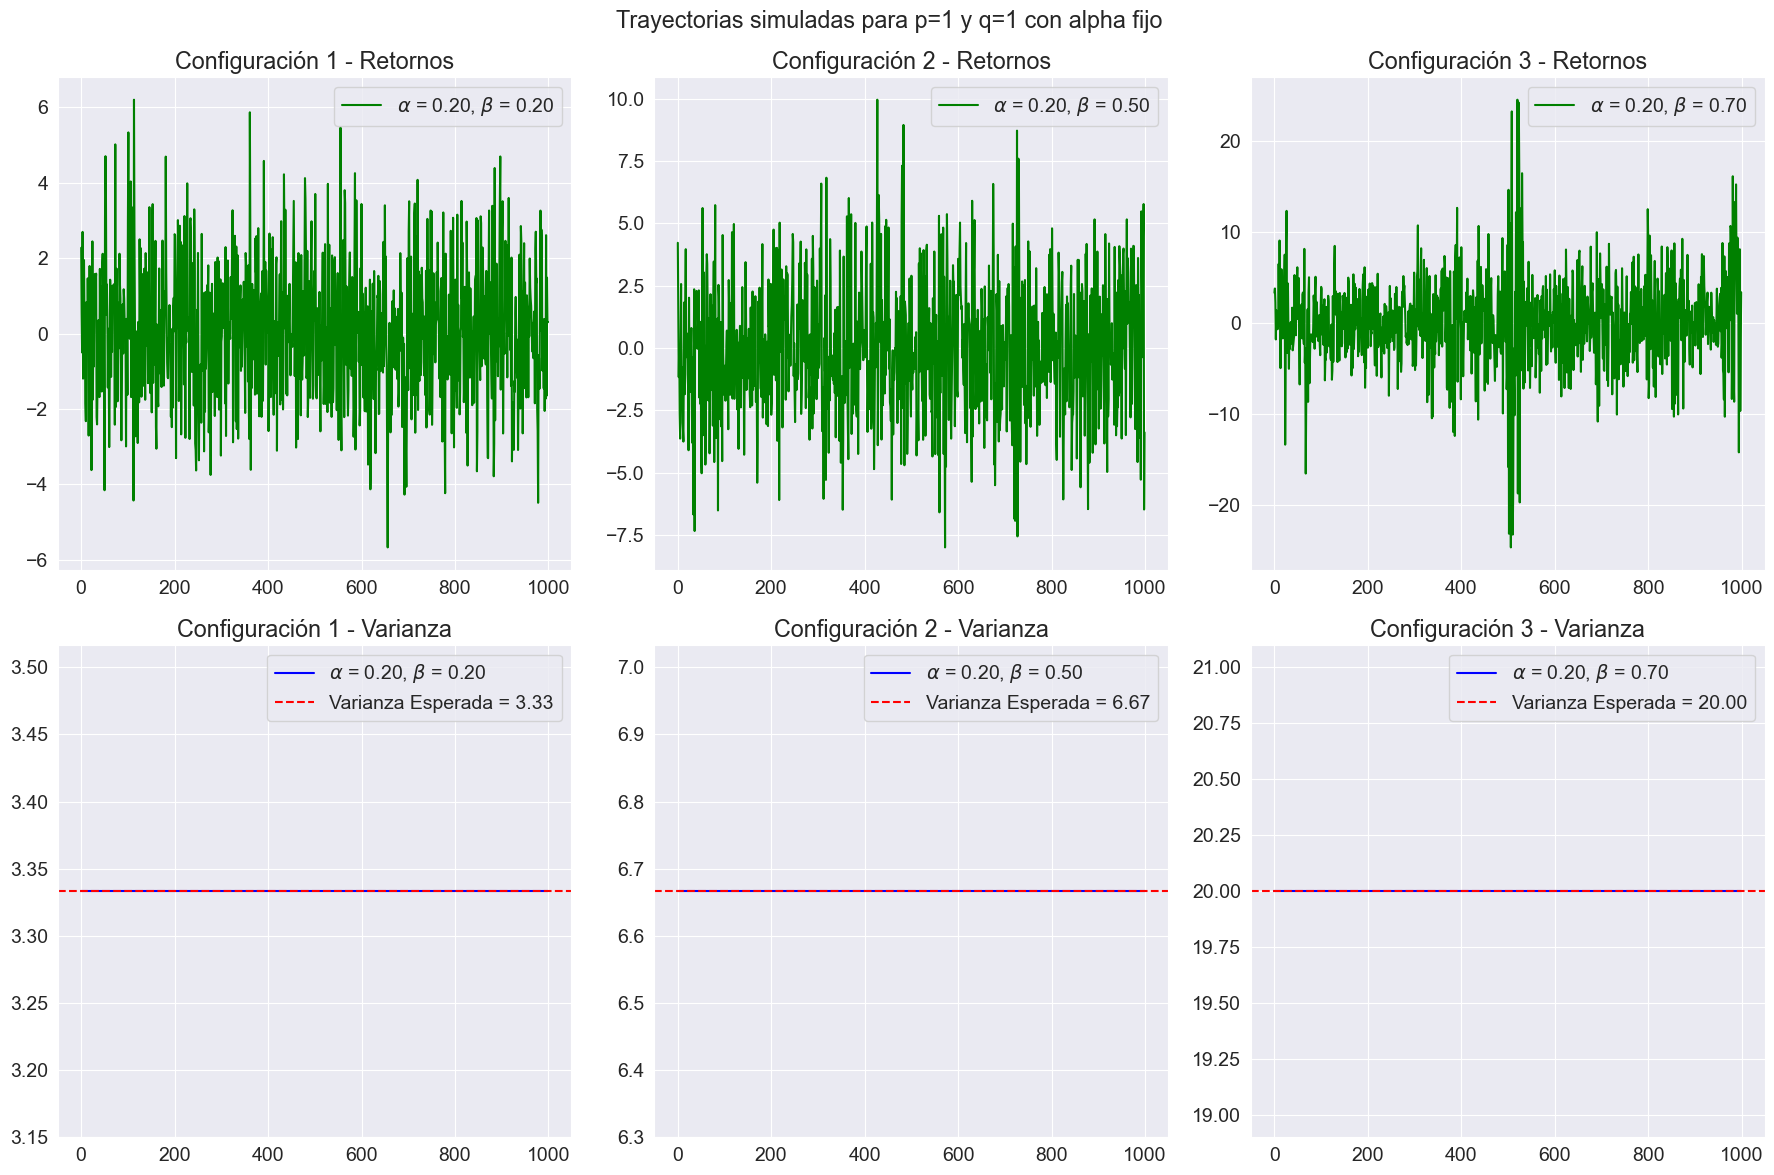

In [50]:
# Hiperparámetros
p = 1
q = 1

# Parámetros
mu = 0
omega = 2
alpha = 0.2  # Valor fijo de alpha

# Valores de beta para cada gráfica
beta_values = [0.2, 0.5, 0.7]

n_datos = 1000

# Semilla para reproducibilidad
np.random.seed(42)

# Crear y simular el modelo GARCH para configuraciones diferentes de beta
sim_mod = arch_model(None, p=p, o=0, q=q, dist="normal")
datos_simulados_retornos = []
datos_simulados_varianza = []

# Graficar las trayectorias simuladas en una grilla 2x3
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for i in range(len(beta_values)):
    # Asegurar estacionaridad
    if alpha + beta_values[i] >= 1:
        scale_factor = 0.9 / (alpha + beta_values[i])
        alpha_scaled = alpha * scale_factor
        beta_scaled = beta_values[i] * scale_factor
    else:
        alpha_scaled = alpha
        beta_scaled = beta_values[i]

    params = {"mu": mu, "omega": omega, f"alpha[1]": alpha_scaled, f"beta[1]": beta_scaled}
    param = pd.Series(params)
    sim_data = sim_mod.simulate(param, n_datos)
    datos_simulados_retornos.append(sim_data["data"])

    # Calcular varianza condicional
    varianza_condicional = omega / (1 - alpha_scaled - beta_scaled)
    datos_simulados_varianza.append(np.full_like(sim_data["data"], varianza_condicional))

    # Gráficos para la primera fila (retornos)
    axs[0, i].plot(datos_simulados_retornos[i], label=fr'$\alpha$ = {alpha_scaled:.2f}, $\beta$ = {beta_scaled:.2f}', color='green')
    axs[0, i].set_title(fr'Configuración {i+1} - Retornos')
    axs[0, i].legend()

    # Gráficos para la segunda fila (varianza)
    axs[1, i].plot(datos_simulados_varianza[i], label=fr'$\alpha$ = {alpha_scaled:.2f}, $\beta$ = {beta_scaled:.2f}', color='blue')
    axs[1, i].axhline(y=varianza_condicional, color='red', linestyle='--', label=f'Varianza Esperada = {varianza_condicional:.2f}')
    axs[1, i].set_title(fr'Configuración {i+1} - Varianza')
    axs[1, i].legend()

plt.suptitle(f'Trayectorias simuladas para p={p} y q={q} con alpha fijo')
plt.tight_layout()
plt.show()